In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

import anndata2ri
import rpy2
from rpy2.robjects import r


anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [3]:
organoid_gex = sc.read('../../fetal_lung/Roche/new_20230705/gut_scpoli_integration.h5ad')

In [4]:
organoid_gex

AnnData object with n_obs × n_vars = 806646 × 2000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'leiden', 'leiden_10.0', 'level_1_late', 'level_2_late', 'level_3_late'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'umap'
    obsm: 'X_scPoli', 'X_umap', 'X_umap_min', 'X_umap_sc'
    layers: 'ambiguous', 'counts', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

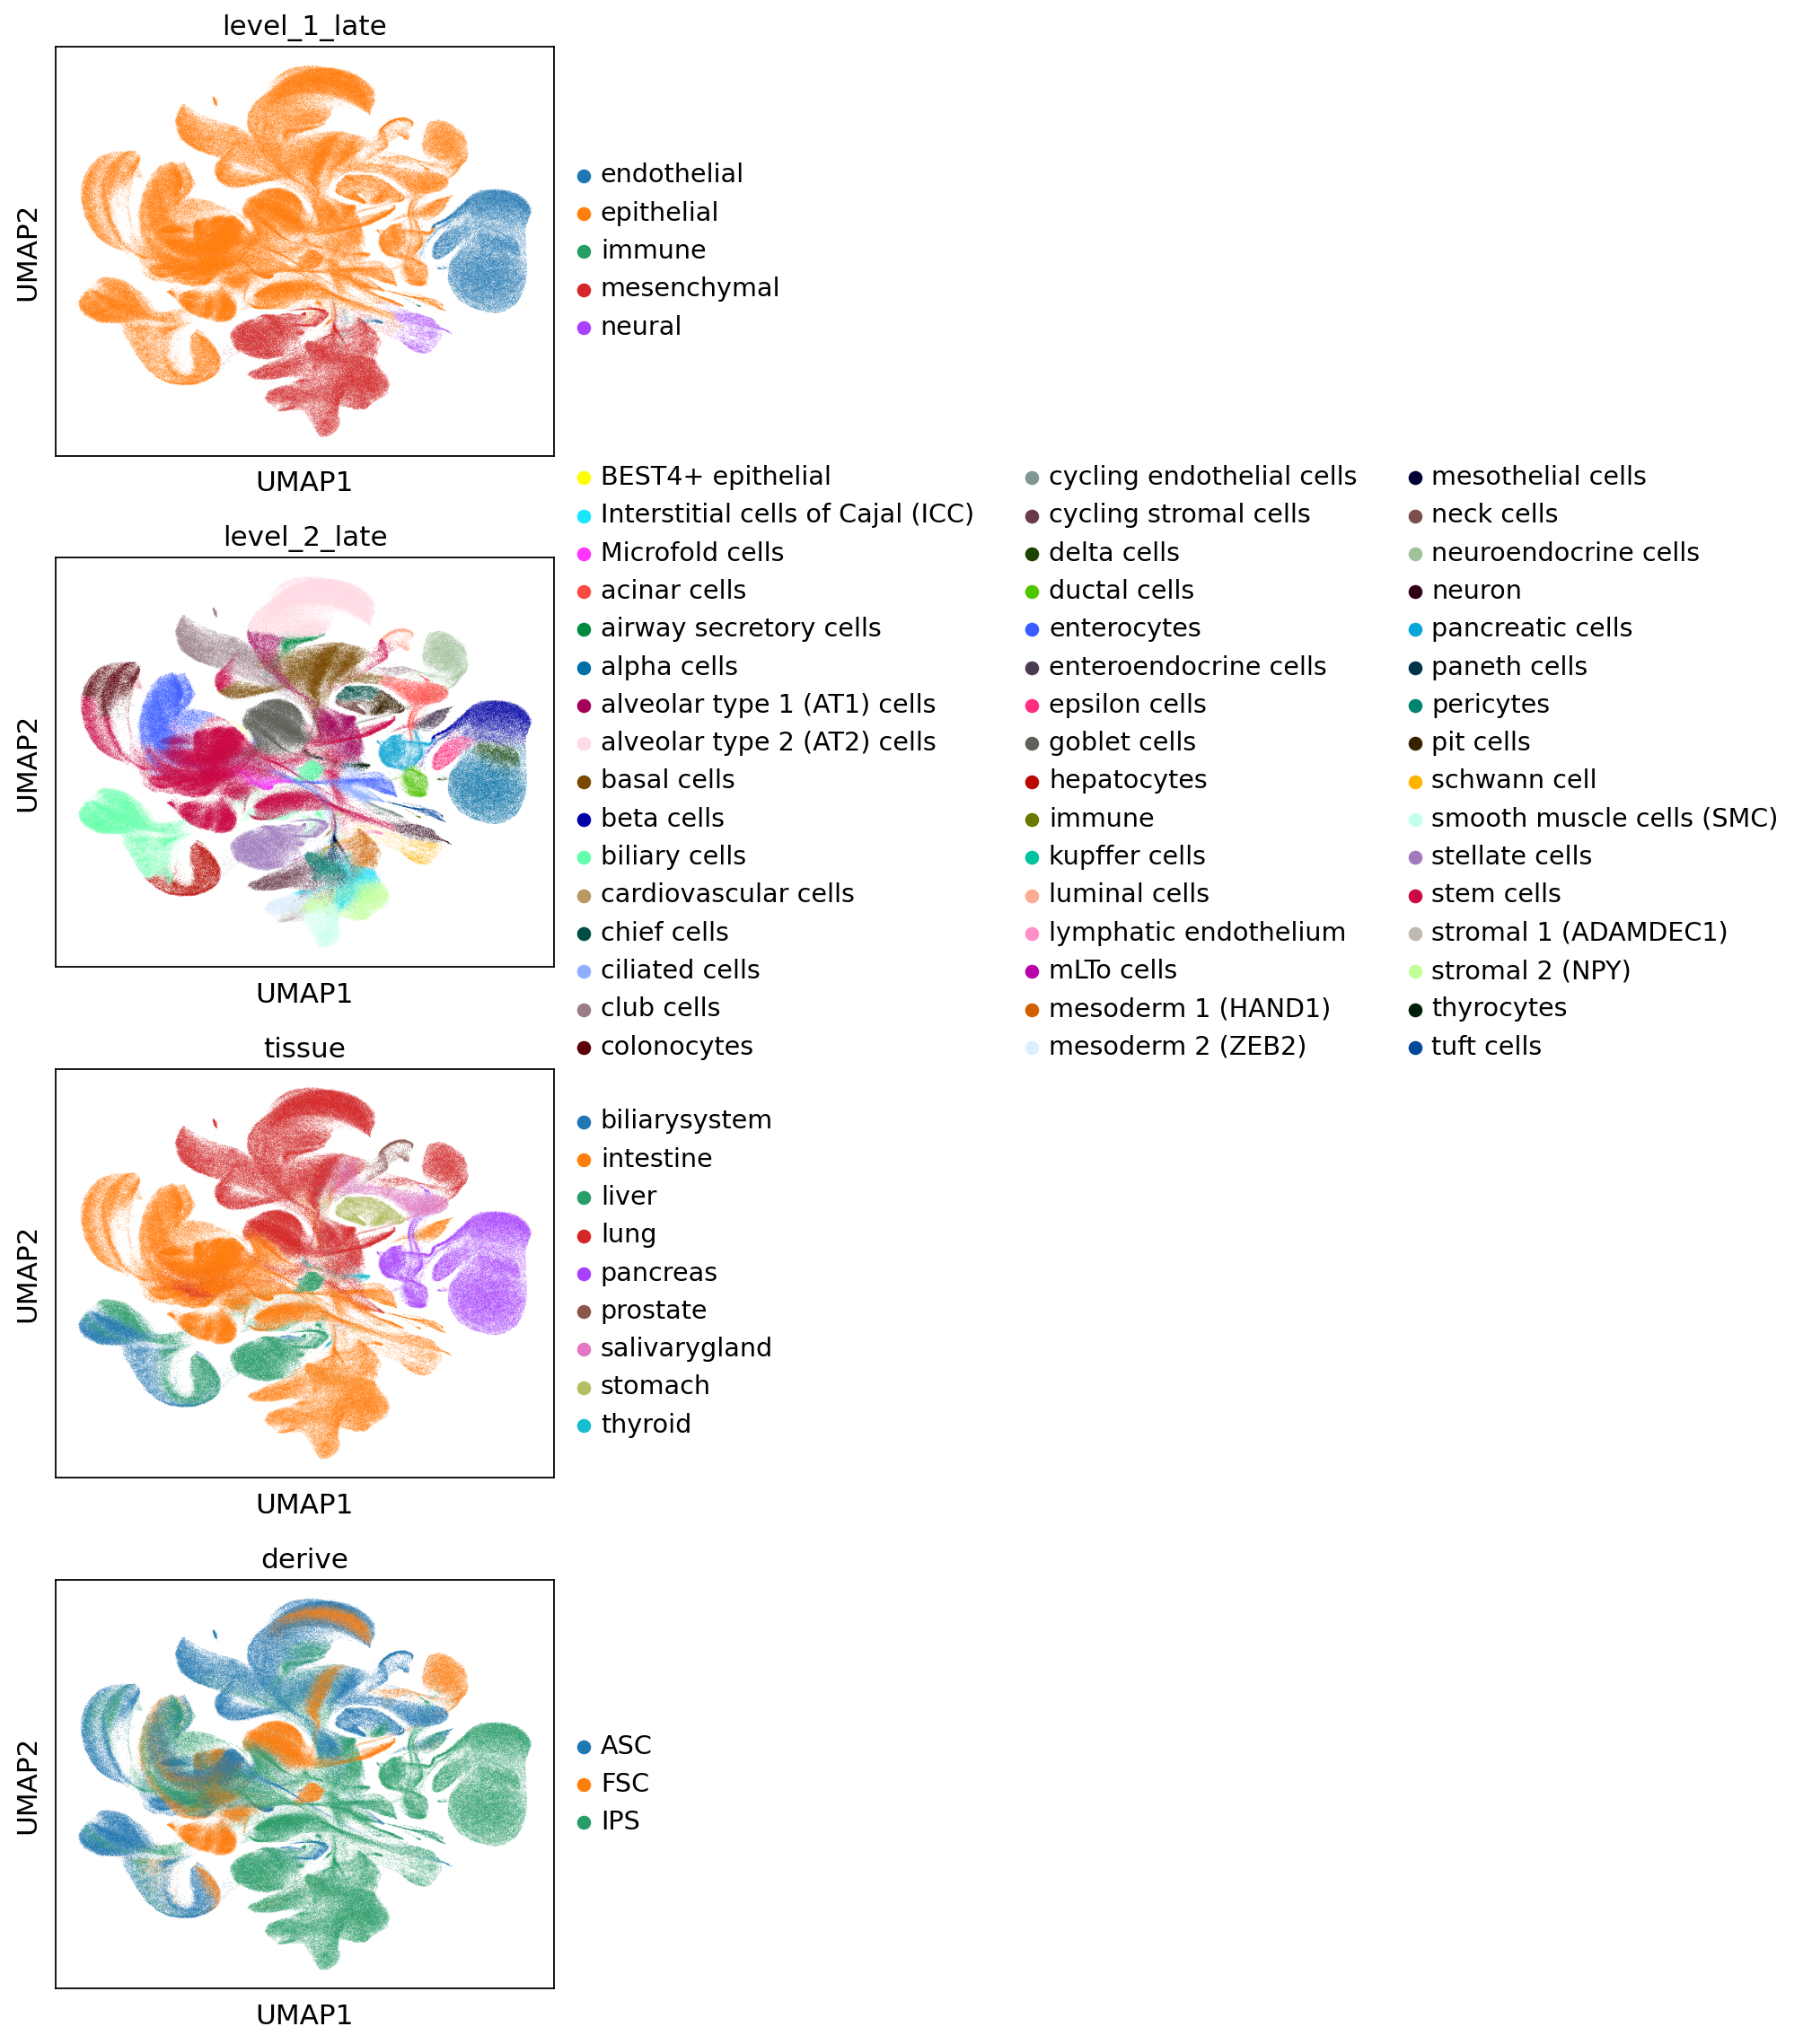

In [5]:
sc.pl.umap(organoid_gex, color = ['level_1_late','level_2_late','tissue' ,'derive'], ncols=1)

In [6]:
organoid_gex = organoid_gex[organoid_gex.obs.tissue.isin(['intestine'])].copy()

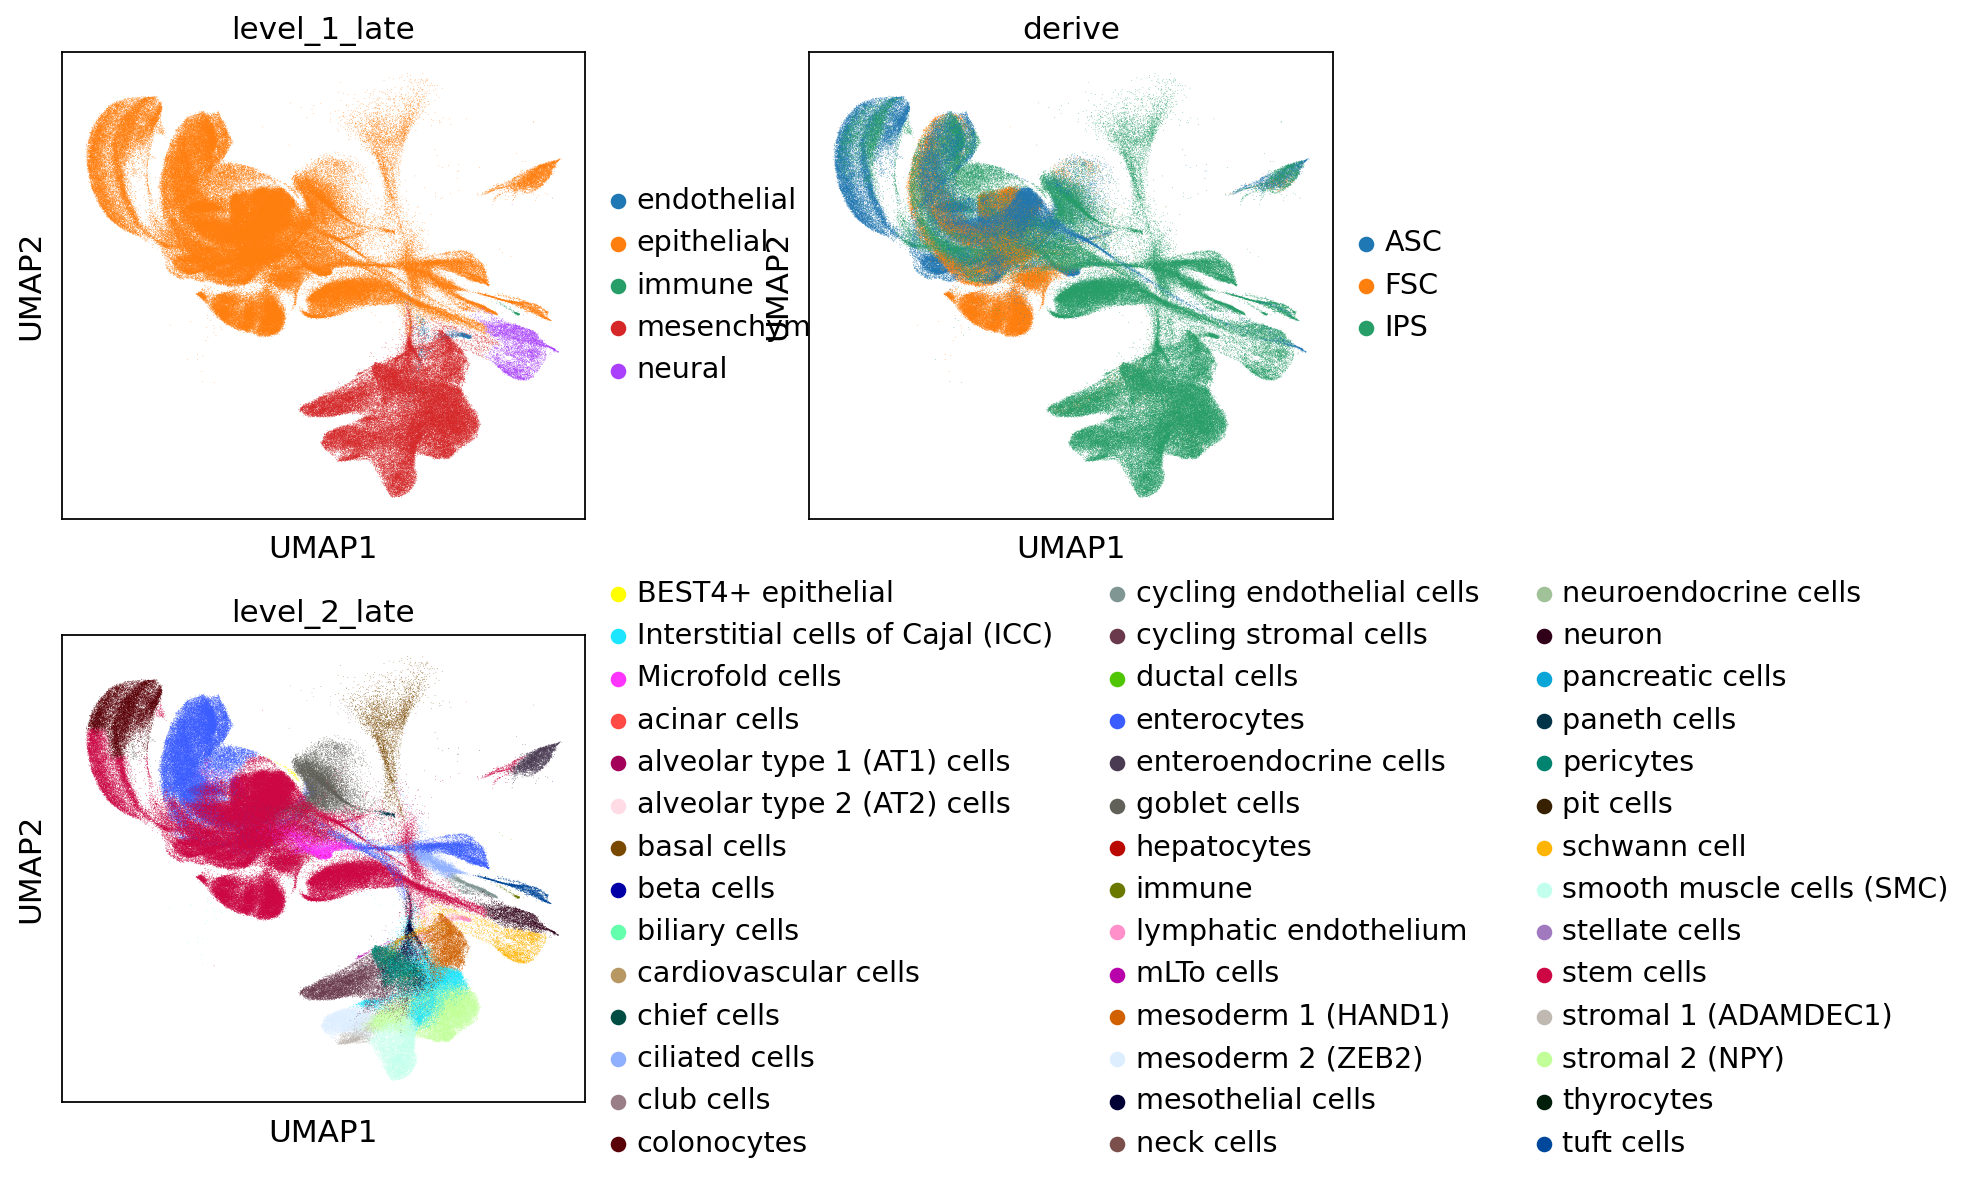

In [7]:
sc.pl.umap(organoid_gex, color = ['level_1_late','derive','level_2_late'], ncols=2, wspace = 0.3)

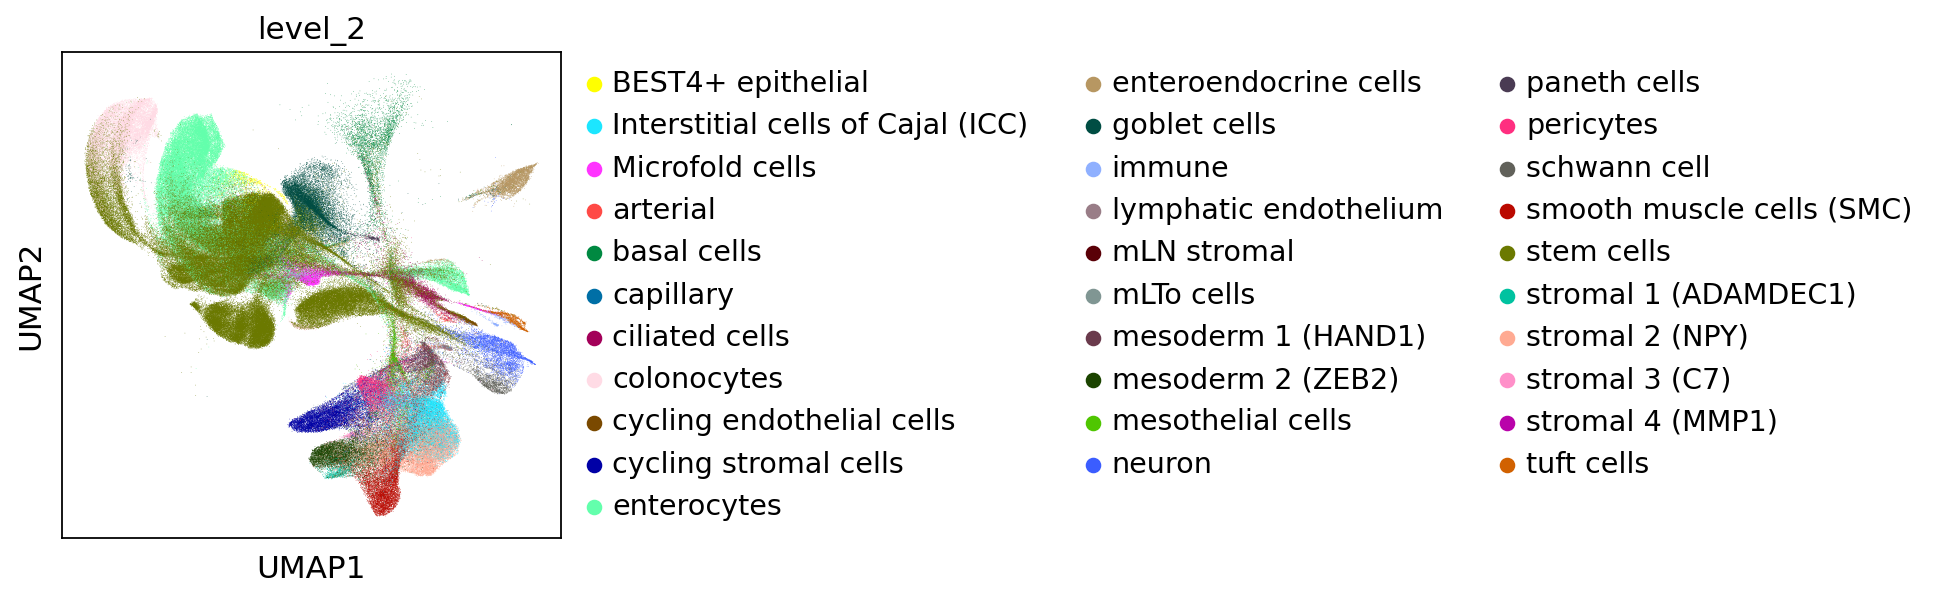

In [8]:
sc.pl.umap(organoid_gex, color = ['level_2'], ncols=2, wspace = 0.3)

In [9]:
organoid_gex.obs.tissue.value_counts()

intestine    353140
Name: tissue, dtype: int64

In [10]:
# organoid_gex.X[1:10,1:10].toarray()  # organoid data in X slot is normalised

In [11]:
tissue_latent = sc.read('../../fetal_lung/Roche/intestine_fetal_adult_atlas/adata_latent_source.h5ad')

# map colors
col_map = pd.read_table('gut_scpoli_color.txt', header=None, index_col=0)
col_map = dict(zip(col_map.index, col_map[1]))
tissue_latent.uns['Cell_type_colors'] = tissue_latent.obs.Cell_type.cat.categories.map(col_map).tolist()

In [12]:
organoid_gex.uns['level_2_late_colors'] = organoid_gex.obs.level_2_late.cat.categories.map(col_map).tolist()
organoid_gex.uns['level_2_colors'] = organoid_gex.obs.level_2.cat.categories.map(col_map).tolist()
organoid_gex.uns['derive_colors'] = organoid_gex.obs.derive.cat.categories.map(col_map).tolist()

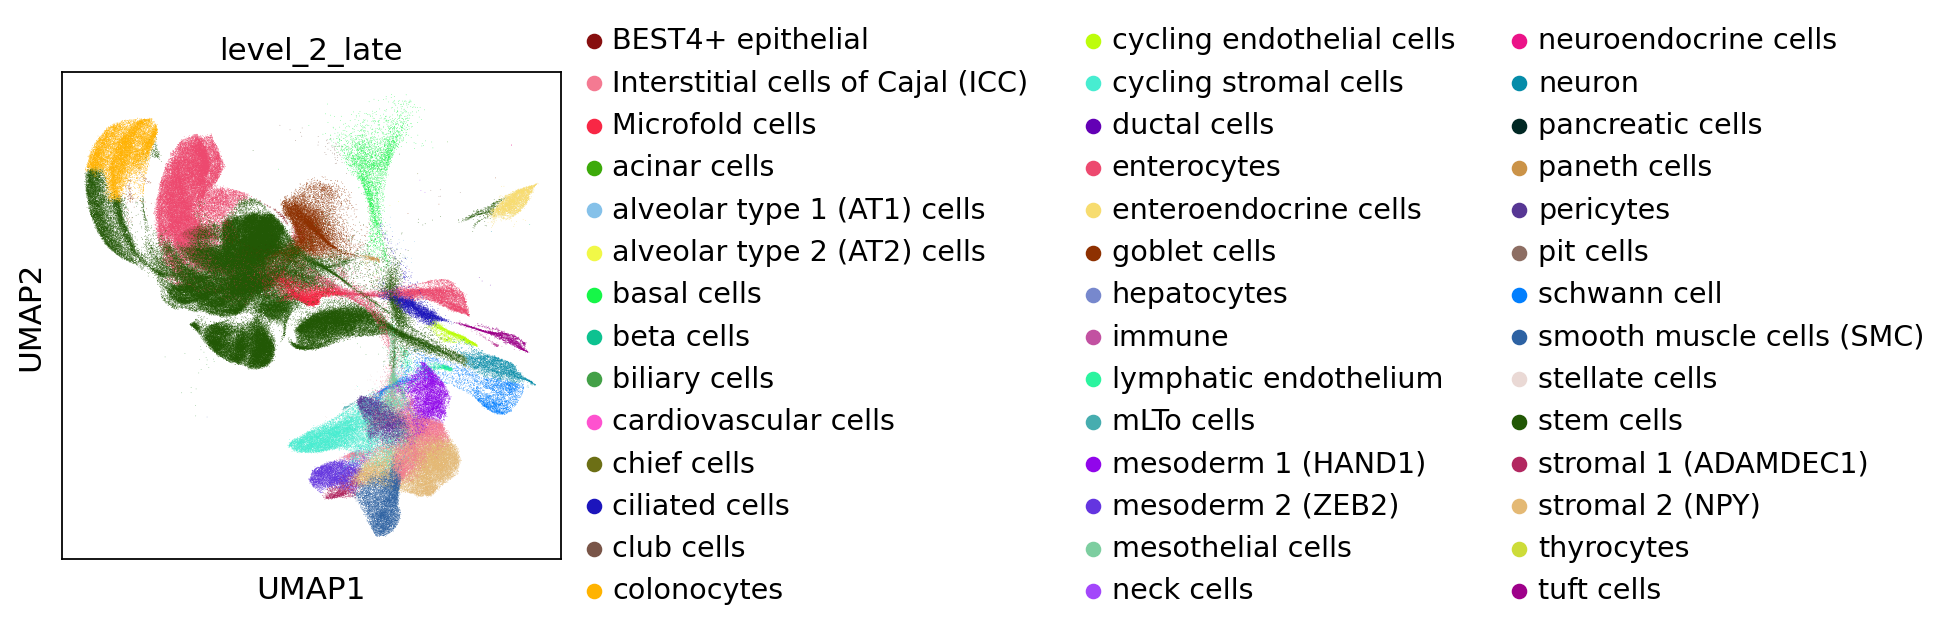

In [13]:
sc.pl.umap(organoid_gex, color = ['level_2_late'], ncols=2, wspace = 0.3)

In [14]:
%%R -i organoid_gex
organoid_gex

class: SingleCellExperiment 
dim: 2000 353140 
metadata(10): hvg leiden ... derive_colors level_2_colors
assays(5): X ambiguous counts spliced unspliced
rownames(2000): ADAMTS9-AS2 BHLHE40-AS1 ... ZNF804A ZWINT
rowData names(6): highly_variable means ... highly_variable_nbatches
  highly_variable_intersection
colnames(353140): AAAACCGAAACA-0-0-0-17 AAAACCTTTAGT-0-0-0-17 ...
  TTTGTTGTCGTGACTA.1-207 TTTGTTGTCTGTGTGA.1-207
colData names(38): initial_size_spliced initial_size_unspliced ...
  level_2_late level_3_late
reducedDimNames(4): X_scPoli UMAP X_umap_min X_umap_sc
altExpNames(0):


### Compute Neighborhoods 

### Tissue

In [15]:
%%R
library(miloR)
library(scrabbitr)


Loading required package: edgeR
Loading required package: limma

Attaching package: ‘limma’

The following object is masked from ‘package:BiocGenerics’:

    plotMA


Attaching package: ‘edgeR’

The following object is masked from ‘package:SingleCellExperiment’:

    cpm

Loading required package: ggplot2
Loading required package: data.table
data.table 1.14.8 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com

Attaching package: ‘data.table’

The following object is masked from ‘package:SummarizedExperiment’:

    shift

The following object is masked from ‘package:GenomicRanges’:

    shift

The following object is masked from ‘package:IRanges’:

    shift

The following objects are masked from ‘package:S4Vectors’:

    first, second

Possible Ensembl SSL connectivity problems detected.
Please see the 'Connection Troubleshooting' section of the biomaRt vignette
vignette('accessing_ensembl', package = 'biomaRt')Error in curl::curl_fetch_memory(url, handle = handle) : 
 

In [16]:
%%R
t_milo <- readRDS("compare_nhoods/intestine_analysis/t_milo.rds")

In [17]:
%%R
t_milo

class: Milo 
dim: 3000 15773 
metadata(2): hvg log1p
assays(3): X counts logcounts
rownames(3000): A1BG A4GALT ... ZXDC ZZEF1
rowData names(18): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(15773): S1_AAACCTGGTCTCATCC_fetal-0
  S1_AAACCTGGTGCCTGGT_fetal-0 ... TTTGTTGAGCTCGACC-1-2-1
  TTTGTTGCATGCCGGT-1-2-1
colData names(16): sample_id Age ... n_genes tissue
reducedDimNames(1): UMAP
altExpNames(0):
nhoods dimensions(2): 15773 753
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 753
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 753 753


In [18]:
%%R
suppressPackageStartupMessages(library(ggraph))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(viridis))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(ggrastr))
suppressPackageStartupMessages(library(ggridges))
suppressPackageStartupMessages(library(ggalluvial))
suppressPackageStartupMessages(library(ggrepel))

In [19]:
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(5, 12))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


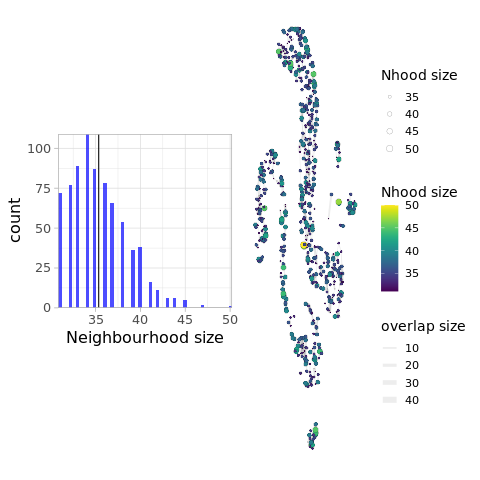

In [20]:
%%R

options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 300)

p1 <- scrabbitr::plotNhoodSizeHist(t_milo, colour="blue")
#ggsave("../plots/compare_nhoods/r_milo_nhood_size_hist.pdf", p1, width=4, height=4, dpi=300)

p2 <- plotNhoodGraph(t_milo, size_range=c(0.1,3), node_stroke=0.1) + 
scale_fill_viridis(name = "Nhood size", option = "viridis", direction = 1) 
#ggsave("../plots/compare_nhoods/r_nhood_size_graph.pdf", p2, width=6, height=5, dpi=300)

grid.arrange(p1, p2, nrow=1)

### Organoid

In [21]:
%%R
set.seed(2012)
# Compute organoid neighbourhoods - FSC
o_milo <- Milo(organoid_gex)
o_milo <- buildGraph(o_milo, k=30, d=2, reduced.dim="UMAP")
o_milo <- makeNhoods(o_milo, prop=0.05, k=30, d=2,refined=T, reduced_dims="UMAP")

Constructing kNN graph with k:30
Checking valid object
Running refined sampling with reduced_dim
In addition: Warning message:
In (function (to_check, X, clust_centers, clust_info, dtype, nn,  :
  detected tied distances to neighbors, see ?'BiocNeighbors-ties'


In [22]:
%%R
o_milo <- buildNhoodGraph(o_milo)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


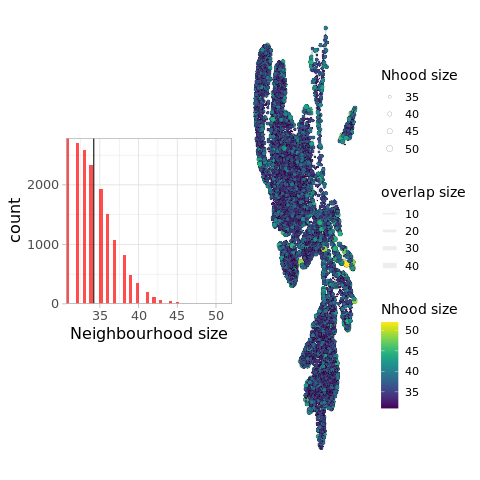

In [23]:
%%R
# Plot nhoods and size distribution
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 300)

p3 <- plotNhoodSizeHist(o_milo, colour="red")
#ggsave("../plots/compare_nhoods/m_milo_nhood_size_hist.pdf", p3, width=4, height=4, dpi=300)

p4 <- plotNhoodGraph(o_milo,size_range=c(0.1,3) ,node_stroke=0.1) + 
scale_fill_viridis(name = "Nhood size", option = "viridis", direction=1)
#ggsave("../plots/compare_nhoods/m_nhood_size_graph.pdf", p4, width=6, height=5, dpi=300)

grid.arrange(p3, p4, nrow = 1)

In [24]:
%%R
o_milo

class: Milo 
dim: 2000 353140 
metadata(10): hvg leiden ... derive_colors level_2_colors
assays(5): X ambiguous counts spliced unspliced
rownames(2000): ADAMTS9-AS2 BHLHE40-AS1 ... ZNF804A ZWINT
rowData names(6): highly_variable means ... highly_variable_nbatches
  highly_variable_intersection
colnames(353140): AAAACCGAAACA-0-0-0-17 AAAACCTTTAGT-0-0-0-17 ...
  TTTGTTGTCGTGACTA.1-207 TTTGTTGTCTGTGTGA.1-207
colData names(38): initial_size_spliced initial_size_unspliced ...
  level_2_late level_3_late
reducedDimNames(4): X_scPoli UMAP X_umap_min X_umap_sc
altExpNames(0):
nhoods dimensions(2): 353140 17060
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 17060
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 17060 17060


In [25]:
%%R
t_milo

class: Milo 
dim: 3000 15773 
metadata(2): hvg log1p
assays(3): X counts logcounts
rownames(3000): A1BG A4GALT ... ZXDC ZZEF1
rowData names(18): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(15773): S1_AAACCTGGTCTCATCC_fetal-0
  S1_AAACCTGGTGCCTGGT_fetal-0 ... TTTGTTGAGCTCGACC-1-2-1
  TTTGTTGCATGCCGGT-1-2-1
colData names(16): sample_id Age ... n_genes tissue
reducedDimNames(1): UMAP
altExpNames(0):
nhoods dimensions(2): 15773 753
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 753
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 753 753


In [26]:
%%R
# counts(o_milo) <- assays(o_milo)[['X']] # count assay already exists
assay(o_milo, "logcounts") <- assays(o_milo)[['X']]

In [27]:
%%R
# o_milo

assay(o_milo, "logcounts")[1:10,1:10]

10 x 10 sparse Matrix of class "dgCMatrix"
                                                             
ADAMTS9-AS2 .        .         . .        . . . . . .        
BHLHE40-AS1 .        .         . .        . . . . . .        
CARMN       .        .         . .        . . . . . .        
CASC15      .        .         . .        . . . . . .        
CASC19      .        0.5725925 . .        . . . . . .        
CDKN2B-AS1  1.156506 .         . .        . . . . . .        
CRNDE       .        .         . .        . . . . . .        
CYTOR       1.156506 .         . 1.154742 . . . . . 0.3442376
DNM3OS      .        .         . .        . . . . . .        
DRAIC       .        .         . .        . . . . . .        


  [[ suppressing 10 column names ‘AAAACCGAAACA-0-0-0-17’, ‘AAAACCTTTAGT-0-0-0-17’, ‘AAAACGTCTTCT-0-0-0-17’ ... ]]


In [28]:
%%R
assay(t_milo, "logcounts")[1:200,1:10]

200 x 10 sparse Matrix of class "dgCMatrix"
                                                                               
A1BG       .         .         .         .        .         .         .        
A4GALT     .         .         .         .        .         .         .        
AACS       .         .         0.4529639 .        .         .         .        
AADAC      1.5516312 .         1.1914556 .        .         1.4790288 1.3924382
AAK1       0.3458851 .         .         .        .         .         .        
AASS       .         0.6737291 .         .        .         .         .        
AATK       .         .         0.4529639 .        .         .         0.4082004
ABCA1      .         .         .         .        .         .         .        
ABCA2      .         .         0.4529639 .        .         .         .        
ABCA3      .         .         .         .        .         .         .        
ABCA4      .         .         .         .        .         .         .     

AADAC      0.7332246 0.7283956 .        
AAK1       .         0.2373924 .        
AASS       .         .         .        
AATK       0.7332246 0.4291016 .        
ABCA1      .         0.2373924 .        
ABCA2      .         .         .        
ABCA3      .         .         .        
ABCA4      .         .         .        
ABCA5      0.7332246 0.8500195 1.2397474
ABCA7      .         .         .        
ABCB1      .         .         .        
ABCB10     .         .         .        
ABCB9      .         .         .        
ABCC1      .         .         .        
ABCC2      0.7332246 0.2373924 .        
ABCC5      .         .         .        
ABCC8      .         .         .        
ABCG1      .         .         .        
ABCG5      0.7332246 0.2373924 .        
ABHD14A    .         0.2373924 .        
ABHD15     .         .         0.8008217
ABHD2      0.7332246 0.8500195 0.4785205
ABHD3      0.7332246 0.9584421 0.4785205
ABHD5      0.7332246 0.8500195 0.8008217
ABHD8      .    

  [[ suppressing 10 column names ‘S1_AAACCTGGTCTCATCC_fetal-0’, ‘S1_AAACCTGGTGCCTGGT_fetal-0’, ‘S1_AAACCTGGTGTAAGTA_fetal-0’ ... ]]


### Run neighbourhood comparison pipeline

In [29]:
%%R
head(rownames(t_milo))

[1] "A1BG"   "A4GALT" "AACS"   "AADAC"  "AAK1"   "AASS"  


In [30]:
%%R
head(rownames(o_milo))

[1] "ADAMTS9-AS2" "BHLHE40-AS1" "CARMN"       "CASC15"      "CASC19"     
[6] "CDKN2B-AS1" 


Computing Nhood similarities based on 2k genes, since organoid data is 2k. 

In [31]:
# union of genes ?

In [32]:
%%R
# Run pipeline
out <- scrabbitr::calcNhoodSim(t_milo, o_milo, orthologs= cbind(rownames(o_milo), rownames(o_milo)) ,
                               sim_preprocessing="gene_spec", sim_measure="pearson",
                               hvg_join_type="intersection", max_hvgs=2000, 
                               export_dir = "compare_nhoods/all_organoid_analyses", 
                               verbose = TRUE)

Selecting features...
Combining features...
Averaging expression across neighbourhoods...
Computing similarity across neighbourhoods...
Exporting results...


In [33]:
%%R
saveRDS(out, "compare_nhoods/intestine_analysis/all_organoids_scrabbitr_out.rds")

In [34]:
%%R
names(out)

[1] "r_vals"    "m_vals"    "nhood_sim"


In [35]:
# %%R
# head(colData(o_milo))

In [36]:
%%R

# Extract neighbourhood graph
t_graph <- nhoodGraph(t_milo)
o_graph <- nhoodGraph(o_milo)

# Add nhood attributes to igraph
t_nhoodIDs <- as.numeric(vertex_attr(t_graph)$name) 
t_indCells <- colnames(t_milo)[t_nhoodIDs]

V(t_graph)$cell_name <- t_indCells
V(t_graph)$celltype <- colData(t_milo)[t_indCells, "Cell_type"]

o_nhoodIDs <- as.numeric(vertex_attr(o_graph)$name) 
o_indCells <- colnames(o_milo)[o_nhoodIDs]

V(o_graph)$cell_name <- o_indCells
V(o_graph)$celltype <- colData(o_milo)[o_indCells, "level_2_late"]

In [37]:
%%R
t_milo

class: Milo 
dim: 3000 15773 
metadata(2): hvg log1p
assays(3): X counts logcounts
rownames(3000): A1BG A4GALT ... ZXDC ZZEF1
rowData names(18): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(15773): S1_AAACCTGGTCTCATCC_fetal-0
  S1_AAACCTGGTGCCTGGT_fetal-0 ... TTTGTTGAGCTCGACC-1-2-1
  TTTGTTGCATGCCGGT-1-2-1
colData names(16): sample_id Age ... n_genes tissue
reducedDimNames(1): UMAP
altExpNames(0):
nhoods dimensions(2): 15773 753
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(1): graph
nhoodIndex names(1): 753
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 753 753


In [38]:
%%R
# Calculate maximum correlations  
t_maxNhoods <- getMaxMappings(out$nhood_sim, 1, long_format=FALSE) # rabbit-mouse
o_maxNhoods <- getMaxMappings(out$nhood_sim, 2, long_format=FALSE) # mouse-rabbit
df_simFilt <- rbind(t_maxNhoods, o_maxNhoods)

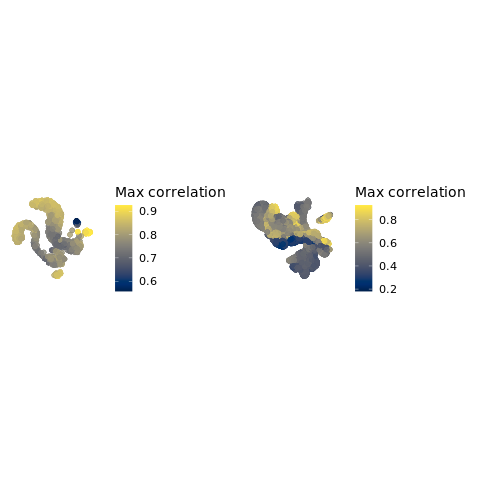

In [39]:
%%R

options(repr.plot.width = 18, repr.plot.height = 8, repr.plot.res = 300)

p1 <- plotNhoodMaxSim(t_milo, t_maxNhoods)
p2 <- plotNhoodMaxSim(o_milo, o_maxNhoods)
grid.arrange(p1,p2,nrow=1)

ggsave("compare_nhoods/intestine_analysis/tissue_oAll_max_corr.pdf", p1, width=10, height=8, dpi=300)
ggsave("compare_nhoods/intestine_analysis/organoid_all_max_corr.pdf", p2, width=10, height=8, dpi=300)

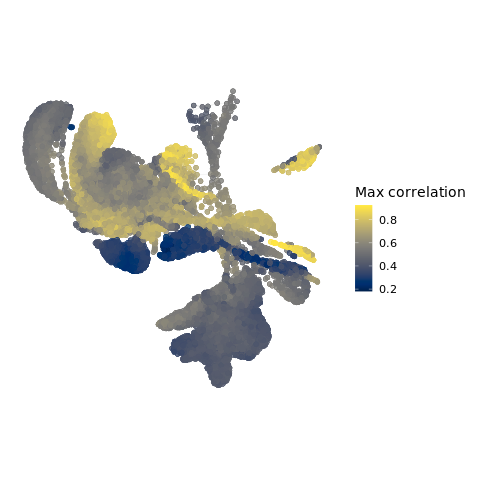

In [40]:
%%R
p2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1805  0.4463  0.5652  0.5572  0.6687  0.9266 


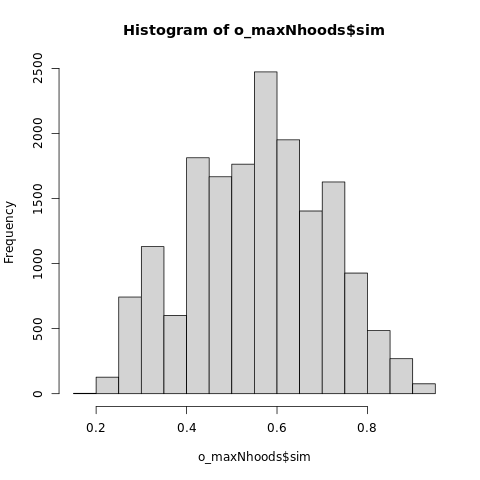

In [41]:
%%R
print(summary(o_maxNhoods$sim))
hist(o_maxNhoods$sim)

In [42]:
%%R
p2 <- plotNhoodMaxSim(o_milo, o_maxNhoods)
ggdat_index_cell_labels = cbind(p2$data, 
                                celltype = as.character(colData(o_milo)$level_2_late[o_maxNhoods$nhoods2]))



In [43]:
%%R
head(ggdat_index_cell_labels)

           x          y   name size max_correlation .ggraph.orig_index
1 -0.1168246  2.1956484 203896   33       0.3002851                  1
2 -3.9124525  0.9573013 125393   33       0.3202370                  2
3  5.7607045  4.9539695 175006   42       0.7710206                  3
4 -4.1689582  8.4136934  93490   32       0.6107522                  4
5 -5.5981870  6.5651598  93646   32       0.6088320                  5
6 -1.5522190 10.4866009  55846   31       0.8547557                  6
  .ggraph.index circular     celltype
1             1    FALSE   stem cells
2             2    FALSE   stem cells
3             3    FALSE  enterocytes
4             4    FALSE   stem cells
5             5    FALSE   stem cells
6             6    FALSE goblet cells


In [44]:
%%R
summary(ggdat_index_cell_labels$max_correlation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1805  0.4463  0.5652  0.5572  0.6687  0.9266 


In [45]:
%%R
ggdat <- ggdat_index_cell_labels[ggdat_index_cell_labels$max_correlation > .35 | ggdat_index_cell_labels$max_correlation < 0.3,]

In [46]:
%%R
#apply a further filter based on frequency of nhoods within a cell type

freqs <- table(ggdat$celltype)
freqs
ggdat <- ggdat[ggdat$celltype %in% names(freqs)[freqs > 5],]

In [47]:
%%R
table(ggdat[ ggdat$max_correlation < 0.4,"celltype"])


                      basal cells                    ciliated cells 
                                3                                 1 
            cycling stromal cells                       enterocytes 
                                2                                 2 
Interstitial cells of Cajal (ICC)             lymphatic endothelium 
                               66                                 3 
               mesoderm 1 (HAND1)                 mesoderm 2 (ZEB2) 
                               14                               176 
                           neuron                      schwann cell 
                               55                                 1 
        smooth muscle cells (SMC)                        stem cells 
                               16                              1003 
             stromal 1 (ADAMDEC1)                   stromal 2 (NPY) 
                               11                               121 


In [48]:
%%R
table(ggdat[ggdat$max_correlation > 0.8,"celltype"])


          enterocytes enteroendocrine cells          goblet cells 
                  312                   152                   237 
         paneth cells            stem cells            tuft cells 
                    4                    39                    86 


In [49]:
%%R
head(ggdat)

          x         y   name size max_correlation .ggraph.orig_index
3  5.760705  4.953969 175006   42       0.7710206                  3
4 -4.168958  8.413693  93490   32       0.6107522                  4
5 -5.598187  6.565160  93646   32       0.6088320                  5
6 -1.552219 10.486601  55846   31       0.8547557                  6
7 -2.244650  7.115550 184902   32       0.6050818                  7
9 -7.639284 11.465775 306388   34       0.7568674                  9
  .ggraph.index circular     celltype
3             3    FALSE  enterocytes
4             4    FALSE   stem cells
5             5    FALSE   stem cells
6             6    FALSE goblet cells
7             7    FALSE   stem cells
9             9    FALSE  enterocytes


In [50]:
%%R
# how to meaningfully select regions of high and low correlation 
# group by cell type and select nhood with max corr within the cell type


nhood_max_per_celltype = lapply(unique(ggdat$celltype),
                       FUN=function(x){
                           z = ggdat[ggdat$celltype %in% x, ]
                           z[which.max(z$max_correlation),]
                       })



nhood_max_per_celltype_lowcorr = lapply(unique(ggdat$celltype),
                       FUN=function(x){
                           z = ggdat[(ggdat$celltype %in% x), ]
                           z = z[z$max_correlation < 0.3,]
                           z[which.min(z$max_correlation),]
                       })


In [51]:
%%R
nhood_max_per_celltype = do.call(rbind, nhood_max_per_celltype)
nhood_max_per_celltype_lowcorr = do.call(rbind, nhood_max_per_celltype_lowcorr)
nhood_max_per_celltype <- rbind(nhood_max_per_celltype, nhood_max_per_celltype_lowcorr)

In [52]:
%%R
# ggdat_landmark_index_cell <- ggdat_landmark_index_cell[!duplicated(ggdat_landmark_index_cell$celltype),]

nhood_max_per_celltype

                x           y   name size max_correlation .ggraph.orig_index
12285  -6.7917442 14.69937515 134945   32       0.8810634              12285
10335   1.4425106  6.90966988 307516   35       0.8829601              10335
8616   -0.8724394  9.09756374 237415   34       0.9265644               8616
7626   -1.3912566 -6.53016043 138664   32       0.6153774               7626
13223   8.0939054  0.83042586 195424   36       0.5917916              13223
9535    4.4074435 -6.06179762 181365   32       0.5143421               9535
7844   10.5850430  9.98382282 227594   35       0.8828267               7844
14747   2.4005520  6.85094881 230834   38       0.7780424              14747
1540    3.9032192 -7.62221622 300336   33       0.4703542               1540
10992 -11.5354290 11.54401112 314155   38       0.5945954              10992
48      3.9656389 -3.98437548 299567   32       0.5476382                 48
12791   3.7021625 -0.25473142 160363   38       0.6113548              12791

In [53]:
%%R
nhood_max_per_celltype_lowcorr

              x           y   name size max_correlation .ggraph.orig_index
1230  -1.684126  1.57268226 221677   42       0.1805267               1230
10956  6.365839 -0.01421515 216970   35       0.2774276              10956
5092   8.580222 -0.83529013 339203   36       0.2319869               5092
      .ggraph.index circular     celltype
1230           1230    FALSE   stem cells
10956         10956    FALSE schwann cell
5092           5092    FALSE       neuron


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps 



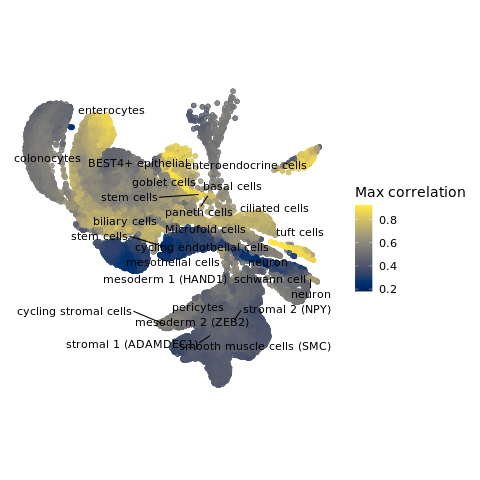

In [54]:
%%R

p2 + geom_text_repel(data = nhood_max_per_celltype, 
                     aes(x= x, y= y, label = celltype))

In [55]:
%%R
nhood_max_per_celltype <- nhood_max_per_celltype[!duplicated(nhood_max_per_celltype),]
p2 <- p2 + geom_text_repel(data = nhood_max_per_celltype, 
                     aes(x= x, y= y, label = celltype), box.padding = 0.95)
ggsave("compare_nhoods/intestine_analysis/intestine_organoid_all_max_corr_annotated_v2.pdf", p2, width=10, height=8, dpi=300)

In addition: Warning message:
ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps 


In [56]:
%%R
head(colData(o_milo))

DataFrame with 6 rows and 38 columns
                      initial_size_spliced initial_size_unspliced initial_size
                                 <numeric>              <numeric>    <numeric>
AAAACCGAAACA-0-0-0-17                  NaN                    NaN          NaN
AAAACCTTTAGT-0-0-0-17                  NaN                    NaN          NaN
AAAACGTCTTCT-0-0-0-17                  NaN                    NaN          NaN
AAAACTCCTGCG-0-0-0-17                  NaN                    NaN          NaN
AAAATAGATCAG-0-0-0-17                  NaN                    NaN          NaN
AAACCGGCGAAT-0-0-0-17                  NaN                    NaN          NaN
                      n_genes_by_counts total_counts total_counts_mt
                              <integer>    <numeric>       <numeric>
AAAACCGAAACA-0-0-0-17              5248        18313            1807
AAAACCTTTAGT-0-0-0-17              5490        16377            1262
AAAACGTCTTCT-0-0-0-17              2907         6284   

In [57]:
celltypecols = organoid_gex.uns['level_2_colors']
celltypecols

['#870f0f',
 '#f47a92',
 '#f82745',
 '#ab1eba',
 '#16f648',
 '#054ddc',
 '#1c15bc',
 '#FFB300',
 '#bdfd0b',
 '#47edd1',
 '#ED496F',
 '#F7DC6F',
 '#8e3101',
 '#c251a1',
 '#2bf49f',
 '#854f49',
 '#46adaf',
 '#9106eb',
 '#6435e0',
 '#7DCEA0',
 '#058ca9',
 '#cb9348',
 '#573794',
 '#027ffe',
 '#2d62a3',
 '#225805',
 '#b22760',
 '#e4b974',
 '#5deb2e',
 '#d6a5fa',
 '#9e018a']

In [58]:
# %%R
# unique(o_milo$level_2[o_milo$level_1 == 'epithelial'])

In [59]:
# %%R
# print(table(o_milo$level_1, o_milo$level_2))

In [60]:
%%R
as.character(unique(o_milo$level_2[o_milo$level_1== 'epithelial']))

 [1] "stem cells"            "enterocytes"           "enteroendocrine cells"
 [4] "goblet cells"          "colonocytes"           "Microfold cells"      
 [7] "ciliated cells"        "BEST4+ epithelial"     "paneth cells"         
[10] "basal cells"           "tuft cells"           


In [61]:
%%R
print(table(colData(t_milo)$Age))


adult   d47   d59   d72   d80   d85  d101  d122  d127  d132 
 9890   438   906   396   494   673   832   776   716   652 


In [62]:
%%R
head(o_maxNhoods)

   nhoods2 nhoods1       sim
1:  203896    1324 0.3002851
2:  125393    2009 0.3202370
3:  175006    5410 0.7710206
4:   93490    8168 0.6107522
5:   93646    8168 0.6088320
6:   55846   10498 0.8547557


In [63]:
%%R
adult_nhoods <- which(t_milo$Age[o_maxNhoods$nhoods1] == 'adult')
head(adult_nhoods)

[1]  4  5  6 10 15 18


In [64]:
%%R
length(adult_nhoods)

[1] 5469


In [65]:
%%R
print(dim(o_maxNhoods))

[1] 17060     3


In addition: Warning message:
The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 
Picking joint bandwidth of 0.025


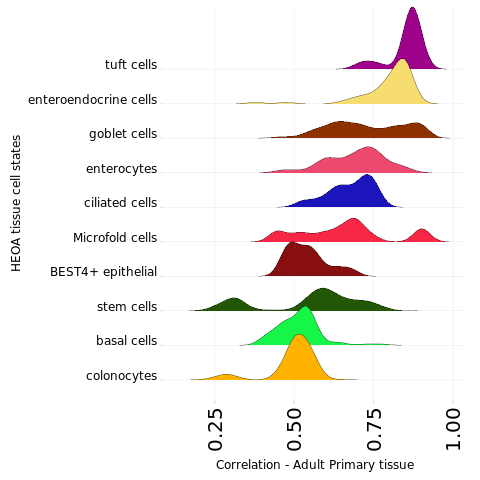

In [66]:
%%R -i celltypecols

# source('plot_utils.R')

names(celltypecols) <- levels(colData(o_milo)$level_2)
adult_nhoods <- which(t_milo$Age[o_maxNhoods$nhoods1] == 'adult')



p <- plotNhoodSimGroups(o_milo, o_maxNhoods$sim, 
                        group_by="level_2",
                        xlabel="Correlation - Adult Primary tissue",
                        ylabel="HEOA tissue cell states",size=0.15, 
                        group_colours=celltypecols,   
                        subset = as.character(unique(o_milo$level_2[o_milo$level_1== 'epithelial'])),
                        rel_min_height=0.001, show_rank = FALSE
                       )

# keep only nhoods in adult
p$data <- p$data[adult_nhoods,]

# drop  celltype levels in empty nhoods
stat_summary <- table(p$data$group)
keep <- stat_summary > 5

p$data <- p$data[p$data$group %in% names(stat_summary)[keep],]
p$data$group <- droplevels(p$data$group)



p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
    
p

In [67]:
%%R
ggsave("compare_nhoods/intestine_analysis/ridgeplot_instestine_adultprimaryTissue_HEOA_nhoodCorr_ann_level_2.pdf", p, width=8, height=10, dpi=300)


Picking joint bandwidth of 0.025


In [68]:
derivecols = organoid_gex.uns['derive_colors']
derive_types = organoid_gex.obs.derive.cat.categories
derive = organoid_gex.obs.derive

In [69]:
%%R
levels(colData(t_milo)$tissue)

[1] "adult" "fetal"


Picking joint bandwidth of 0.0184


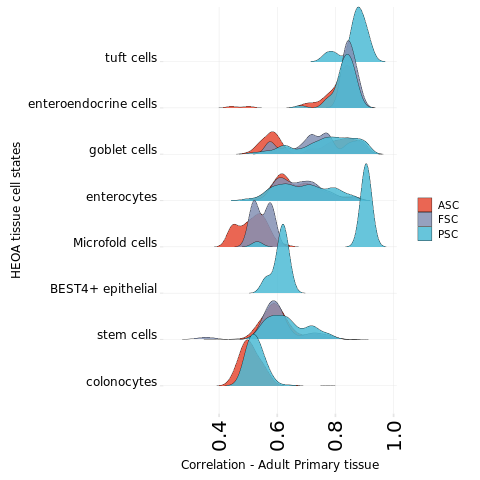

In [70]:
%%R -i derivecols,derive_types,derive

source('plot_utils.R')

# tissuecols <- c(1,2)
# names(tissuecols) <- levels(colData(t_milo)$tissue)


# add information on the stem cell derive type of the index cell of highly correlated nhood
sc_derive_heoa <- o_milo$derive[o_maxNhoods$nhoods2]



derive_types <- gsub('IPS','PSC', derive_types)

names(derivecols) <- derive_types
sc_derive_heoa <- derive[o_maxNhoods$nhoods2]
sc_derive_heoa <- gsub('IPS','PSC', sc_derive_heoa)


p <- plotNhoodSimGroupsAddFill(o_milo, o_maxNhoods$sim,  group_by="level_2",
                        #colour_by="isEpi",
#                         group_fill = factor(sc_derive_heoa, levels = levels(colData(o_milo)$derive)),  
                        group_fill = sc_derive_heoa,       
                        xlabel="Correlation - Adult Primary tissue",
                        ylabel="HEOA tissue cell states",size=0.15, 
                        group_colours=celltypecols, 
                        group_fill_colours =  derivecols,      
                        rel_min_height=0.001, show_rank = FALSE
                       )



# keep only nhoods in adult
p$data <- p$data[adult_nhoods,]

# drop  celltype levels in empty nhoods
stat_summary <- table(p$data$group)
keep <- stat_summary > 5

p$data <- p$data[p$data$group %in% names(stat_summary)[keep],]
p$data$group <- droplevels(p$data$group)

# keep only nhoods that corresponse to nhoods in the same tissue
# p$data <- p$data[nhood_in_primarytissue==nhood_in_heoa,]

p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
    
p

In [71]:
%%R
ggsave("compare_nhoods/intestine_analysis/ridgeplot_instestine_adultprimaryTissue_HEOA_nhoodCorr_ann_level_2_scDerive.pdf", p, width=8, height=10, dpi=300)

Picking joint bandwidth of 0.0184


Picking joint bandwidth of 0.0223


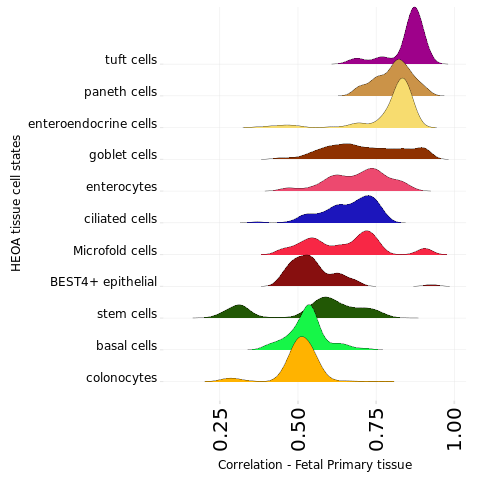

In [72]:
%%R
p <- plotNhoodSimGroups(o_milo, o_maxNhoods$sim, 
                        group_by="level_2",
                        xlabel="Correlation - Fetal Primary tissue",
                        ylabel="HEOA tissue cell states",size=0.15, 
                        group_colours=celltypecols,   
                        subset = as.character(unique(o_milo$level_2[o_milo$level_1== 'epithelial'])),
                        rel_min_height=0.001, show_rank = FALSE
                       )


fetal_nhoods <- which(t_milo$Age[o_maxNhoods$nhoods1] != 'adult')

# keep only nhoods in fetal
p$data <- p$data[fetal_nhoods,]


# drop  celltype levels in empty nhoods
stat_summary <- table(p$data$group)
keep <- stat_summary > 5

p$data <- p$data[p$data$group %in% names(stat_summary)[keep],]
p$data$group <- droplevels(p$data$group)


p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
    
p

In [73]:
%%R
ggsave("compare_nhoods/intestine_analysis/ridgeplot_instestine_fetalprimaryTissue_HEOA_nhoodCorr_ann_level_2.pdf", p, width=8, height=10, dpi=300)


Picking joint bandwidth of 0.0223


Picking joint bandwidth of 0.0231


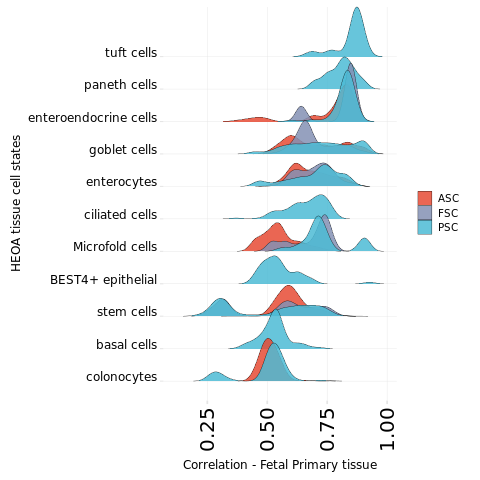

In [74]:
%%R
p <- plotNhoodSimGroupsAddFill(o_milo, o_maxNhoods$sim, 
                        group_by="level_2",
                        group_fill = sc_derive_heoa,  
                        xlabel="Correlation - Fetal Primary tissue",
                        ylabel="HEOA tissue cell states",size=0.15, 
                        group_colours=celltypecols,  
                        group_fill_colours =  derivecols, 
                        subset = as.character(unique(o_milo$level_2[o_milo$level_1== 'epithelial'])),
                        rel_min_height=0.001, show_rank = FALSE
                       )


fetal_nhoods <- which(t_milo$Age[o_maxNhoods$nhoods1] != 'adult')

# keep only nhoods in fetal
p$data <- p$data[fetal_nhoods,]


# drop  celltype levels in empty nhoods
stat_summary <- table(p$data$group)
keep <- stat_summary > 5

p$data <- p$data[p$data$group %in% names(stat_summary)[keep],]
p$data$group <- droplevels(p$data$group)


p <- p + 
    scale_color_manual(values=c("orange","black")) + 
    theme(text = element_text(size=12),
          axis.text = element_text(size=20), 
          axis.text.y = element_text(size = 12),
          axis.ticks = element_line(size = 0.8),
          panel.grid.minor = element_line(size = 0.1), 
          panel.grid.major = element_line(size = 0.2)) 
    
p

In [75]:
%%R
ggsave("compare_nhoods/intestine_analysis/ridgeplot_instestine_fetalprimaryTissue_HEOA_nhoodCorr_ann_level_2_scDerive.pdf", p, width=8, height=10, dpi=300)


Picking joint bandwidth of 0.0231
